# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dellanda Firdauzi Ulwi
- **Email:** dellandafirdauz@gmail.com
- **ID Dicoding:** MC129D5X1534

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi metode pembayaran yang digunakan pelanggan dalam e-commerce?
- Apa metode pembayaran yang paling sering digunakan oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [14]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [15]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
payments_df = pd.read_csv("order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Berhasil menampilkan dataset customer, order, dan payment

### Assessing Data

In [21]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [22]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [23]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [25]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [26]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [27]:
payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [28]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [30]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [32]:
print("Jumlah duplikasi di customers_df:", customers_df.duplicated().sum())

Jumlah duplikasi di customers_df: 0


In [33]:
print("Jumlah duplikasi di orders_df:", orders_df.duplicated().sum())

Jumlah duplikasi di orders_df: 0


In [34]:
print("Jumlah duplikasi di payments_df:", payments_df.duplicated().sum())

Jumlah duplikasi di payments_df: 0


**Insight:**
- Berhasil menampilkan data dan mengecek duplikasinya

### Cleaning Data

Duplicate Data And Cleaning Data

In [36]:
# Mengecek jumlah data duplikat sebelum penghapusan di setiap dataset
jumlah_duplikat_customers = customers_df.duplicated().sum()
jumlah_duplikat_orders = orders_df.duplicated().sum()
jumlah_duplikat_payments = payments_df.duplicated().sum()

print(f"Total data duplikat sebelum dihapus:")
print(f"- customers_df: {jumlah_duplikat_customers}")
print(f"- orders_df: {jumlah_duplikat_orders}")
print(f"- payments_df: {jumlah_duplikat_payments}")

# Menghapus data duplikat dari setiap dataset
customers_df_cleaned = customers_df.drop_duplicates()
orders_df_cleaned = orders_df.drop_duplicates()
payments_df_cleaned = payments_df.drop_duplicates()

# Mengecek kembali jumlah duplikasi setelah penghapusan
jumlah_duplikat_customers_after = customers_df_cleaned.duplicated().sum()
jumlah_duplikat_orders_after = orders_df_cleaned.duplicated().sum()
jumlah_duplikat_payments_after = payments_df_cleaned.duplicated().sum()

print(f"\nTotal data duplikat setelah dihapus:")
print(f"- customers_df: {jumlah_duplikat_customers_after}")
print(f"- orders_df: {jumlah_duplikat_orders_after}")
print(f"- payments_df: {jumlah_duplikat_payments_after}")

Total data duplikat sebelum dihapus:
- customers_df: 0
- orders_df: 0
- payments_df: 0

Total data duplikat setelah dihapus:
- customers_df: 0
- orders_df: 0
- payments_df: 0


Missing Value customer_df

In [37]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [66]:
customers_df.customer_city.value_counts()

,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
bequimao,1
andarai,1
vargem grande,1


In [67]:
customers_df.fillna(value="Prefer not to say", inplace=True)

In [68]:
print("Customers:\n", customers_df.isna().sum())

Customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [69]:
display(customers_df.describe(include='all'))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [70]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Missing Value orders_df

In [38]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [71]:
orders_df.order_status.value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [72]:
orders_df.customer_id.value_counts()

,count
customer_id,
9ef432eb6251297304e76186b10a928d,1
413f7e58270a32396af030a075b924be,1
eb4350b67a0264c67e5e06a038e4afbb,1
622b07d262d545d16efbd4363a89cb91,1
c701fbfa77791abd05eef9eacf7ea7a8,1
...,...
39585f08d13377e50fde35467984e6eb,1
eb3d995301c320683de629f5b4dd0c78,1
f2507ea56d748a23037bb1214964e87d,1


In [73]:
orders_df.fillna(value="Prefer not to say", inplace=True)

In [74]:
print("\nOrders:\n", orders_df.isna().sum())


Orders:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [75]:
display(orders_df.describe(include='all'))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90734,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,Prefer not to say,Prefer not to say,Prefer not to say,2017-12-20 00:00:00
freq,1,1,96478,3,160,1783,2965,522


In [76]:
orders_df[orders_df["order_purchase_timestamp"] == orders_df["order_purchase_timestamp"].max()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
60938,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,canceled,2018-10-17 17:30:18,Prefer not to say,Prefer not to say,Prefer not to say,2018-10-30 00:00:00


In [77]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90734,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,Prefer not to say,Prefer not to say,Prefer not to say,2017-12-20 00:00:00
freq,1,1,96478,3,160,1783,2965,522


Missing Value payments_df

In [39]:
payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [43]:
payments_df.payment_type.value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [50]:
payments_df.fillna(value="Prefer not to say", inplace=True)

In [53]:
print("\nPayments:\n", payments_df.isna().sum())


Payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [56]:
display(payments_df.describe(include='all'))

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [58]:
payments_df[payments_df["payment_value"] == payments_df["payment_value"].max()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08


In [65]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,153.900749
std,0.706584,2.687051,212.270236
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.827500
max,29.000000,24.000000,6929.310000


**Insight:**
- Berhasil melakukan dan menampilkan  total data sebelum dan sesudah proses cleaning data
- Melakukan missing value pada customers_df, orders_df, dan payments_df

## Exploratory Data Analysis (EDA)

### Explore ...

Explore Data Customers

In [87]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
76781,b2df7562698a9df2b394725e932a57fa,030fde5155e0240c5d3c55206fdadd6e,78058,cuiaba,MT
97888,72f7e1911ed992b03dcaab4c0edf7e1b,e338b0b74ad651688b815dbbd8c4a965,3268,sao paulo,SP
87486,f71a5859040b9dbf6327c9c121a74764,d468040bda183009e4ec5a3efb6350ae,15390,itapura,SP
9477,4bcfea5b436d2fce8a78497c515a56e4,3c943fa0307df17ea17cff5d8af3a96c,13635,pirassununga,SP
85832,2b7a772469a92a3676ba4069496c4b67,2a36404701b15c414647a2ec2102baba,78310,comodoro,MT


In [88]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [80]:
# Periksa apakah customer_id unik
print("Apakah customer_id unik?", customers_df.customer_id.is_unique)

Apakah customer_id unik? True


In [91]:
customer_by_state = customers_df.groupby("customer_state").agg({
    "customer_id": "nunique"  # Menghitung jumlah pelanggan unik per provinsi
}).reset_index().sort_values(by="customer_id", ascending=False)

print(customer_by_state)


   customer_state  customer_id
25             SP        41746
18             RJ        12852
10             MG        11635
22             RS         5466
17             PR         5045
23             SC         3637
4              BA         3380
6              DF         2140
7              ES         2033
8              GO         2020
15             PE         1652
5              CE         1336
13             PA          975
12             MT          907
9              MA          747
11             MS          715
14             PB          536
16             PI          495
19             RN          485
1              AL          413
24             SE          350
26             TO          280
20             RO          253
2              AM          148
0              AC           81
3              AP           68
21             RR           46


Explore Data Orders

In [85]:
print(orders_df.sample(5))

                               order_id                       customer_id  \
86115  b895ff08d9469500cf3c3b1ebdee68f0  95a9ff2b2271177a20453388698d84c0   
61114  a009d7c1bdc1d3695519bee1519a07b9  b265a66c9a306642b1ca3d770f8f3c20   
18674  785606fac0b9ddad139f521a70452ca8  708b5721496545c5e8dae3f7b8e677c9   
87620  b62001b38d12c99ffbafa1c609797348  8cb5d5e180e4dbdffdc4af261b618790   
95339  e06698baea08bc0dd2705f763e7d1c89  fe519670d2d8c9305e94315ecbaa45ab   

      order_status order_purchase_timestamp    order_approved_at  \
86115    delivered      2017-11-18 18:10:37  2017-11-18 18:26:58   
61114    delivered      2018-04-02 00:14:15  2018-04-03 07:08:23   
18674    delivered      2017-09-09 08:44:50  2017-09-09 08:55:11   
87620    delivered      2018-04-06 14:14:21  2018-04-10 03:49:50   
95339    delivered      2017-03-20 09:40:22  2017-03-20 09:40:22   

      order_delivered_carrier_date order_delivered_customer_date  \
86115          2017-11-21 13:17:08           2017-12-07 21:0

In [86]:
print(orders_df.describe(include="all"))

                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp  order_approved_at  \
count         99441                    99441              99441   
unique            8                    98875              90734   
top       delivered      2018-04-11 10:48:14  Prefer not to say   
freq          96478                        3                160   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         99441                         99441   
unique                        81019                         95665   
top               Prefer not to say             Prefer not to say 

In [94]:
order_status_distribution = orders_df["order_status"].value_counts()
print(order_status_distribution)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [95]:
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df["order_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")

orders_per_month = orders_df.groupby("order_month").agg({
    "order_id": "count"
}).reset_index()

print(orders_per_month)

   order_month  order_id
0      2016-09         4
1      2016-10       324
2      2016-12         1
3      2017-01       800
4      2017-02      1780
5      2017-03      2682
6      2017-04      2404
7      2017-05      3700
8      2017-06      3245
9      2017-07      4026
10     2017-08      4331
11     2017-09      4285
12     2017-10      4631
13     2017-11      7544
14     2017-12      5673
15     2018-01      7269
16     2018-02      6728
17     2018-03      7211
18     2018-04      6939
19     2018-05      6873
20     2018-06      6167
21     2018-07      6292
22     2018-08      6512
23     2018-09        16
24     2018-10         4


In [99]:
orders_df["order_delivered_customer_date"] = pd.to_datetime(
    orders_df["order_delivered_customer_date"], errors="coerce"
)

orders_df["order_purchase_timestamp"] = pd.to_datetime(
    orders_df["order_purchase_timestamp"], errors="coerce"
)

In [100]:
orders_per_customer = orders_df.groupby("customer_id").agg({
    "order_id": "count"
}).reset_index().sort_values(by="order_id", ascending=False)

print(orders_per_customer)

                            customer_id  order_id
0      00012a2ce6f8dcda20d059ce98491703         1
66279  aa62a16b10e3fb24ecdefd7e4dc3fa65         1
66301  aa738cdb72af39e38482fa25b992c67c         1
66300  aa7210736aad65a84e964cfa8d64aa66         1
66299  aa72002446dfbac0691304465c1b982d         1
...                                 ...       ...
33144  5591abc9e7f9c644e7e7912aac65b718         1
33143  5590e685a78102fb3ac27ecf07412750         1
33142  558ea29f4c4dfd014345b6d3309549a2         1
33141  558de2f6863bf7588338479d614522a3         1
99440  ffffe8b65bbe3087b653a978c870db99         1

[99441 rows x 2 columns]


Explore Data Payment

In [103]:
print(payments_df.sample(5))

                               order_id  payment_sequential payment_type  \
28560  3018cabe571cb8d2600f671021243e3e                   1       boleto   
56130  6bf033a604dd601317705db318a6095d                   1  credit_card   
59211  482d48c0b0eb255bd818a6e6895fb686                   1  credit_card   
65060  fb6f9beaf3a466694906162da16202d9                   1  credit_card   
23499  5209e430c4a82e1eb7cd636ecbb573a3                   1  credit_card   

       payment_installments  payment_value  
28560                     1          70.07  
56130                     3         105.60  
59211                    10         119.84  
65060                    10         214.56  
23499                     5         137.99  


In [104]:
print(payments_df.describe(include="all"))

                                order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103886.000000 

In [105]:
payment_distribution = payments_df.groupby("payment_type").agg({
    "order_id": "count"  # Menghitung jumlah transaksi per metode pembayaran
}).reset_index().rename(columns={"order_id": "transaction_count"}).sort_values(by="transaction_count", ascending=False)

print(payment_distribution)

  payment_type  transaction_count
1  credit_card              76795
0       boleto              19784
4      voucher               5775
2   debit_card               1529
3  not_defined                  3


In [106]:
payment_value_distribution = payments_df.groupby("payment_type").agg({
    "payment_value": "sum"  # Menjumlahkan total nilai pembayaran per metode
}).reset_index().sort_values(by="payment_value", ascending=False)

print(payment_value_distribution)

  payment_type  payment_value
1  credit_card    12528520.11
0       boleto     2862186.39
4      voucher      379436.87
2   debit_card      217989.79
3  not_defined           0.00


Menggabungkan customers_df dan orders_df

In [108]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

# Cek hasil penggabungan
print(orders_customers_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

Menggabungkan orders_customers_df dengan payments_df

In [109]:
final_df = pd.merge(
    left=orders_customers_df,
    right=payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Cek hasil akhir
print(final_df.head())
print(final_df.info())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

In [110]:
final_df.to_csv("final_data.csv", index=False)

**Insight:**
- xxx

## Visualization & Explanatory Analysis

Bagaimana distribusi metode pembayaran yang digunakan pelanggan dalam e-commerce?

<ipython-input-113-8482d369e2da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")


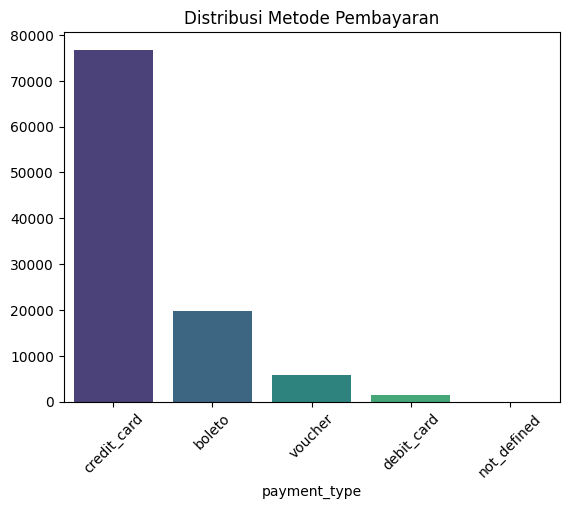

In [113]:
df = pd.read_csv("final_data.csv")
if 'payment_type' in df.columns:
    payment_counts = df['payment_type'].value_counts()
    sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
    plt.title("Distribusi Metode Pembayaran")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Kolom 'payment_method' tidak ditemukan.")

Apa metode pembayaran yang paling sering digunakan oleh pelanggan?

Metode pembayaran yang paling sering digunakan: credit_card


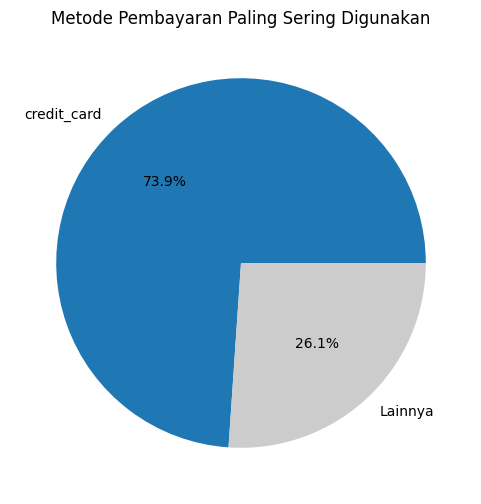

In [114]:
df = pd.read_csv("final_data.csv")
if 'payment_type' in df.columns:
    payment_counts = df['payment_type'].value_counts()
    most_used_payment = payment_counts.idxmax()
    most_used_count = payment_counts.max()
    print(f"Metode pembayaran yang paling sering digunakan: {most_used_payment}")

    plt.figure(figsize=(6, 6))
    plt.pie([most_used_count, payment_counts.sum() - most_used_count], labels=[most_used_payment, "Lainnya"], autopct='%1.1f%%', colors=["#1f77b4", "#cccccc"])
    plt.title("Metode Pembayaran Paling Sering Digunakan")
    plt.show()
else:
    print("Kolom 'payment_method' tidak ditemukan.")

**Insight:**
- Berhasil menampilkan visualisasi dan data sesuai dengan pertanyaan

## Analisis Lanjutan (Opsional)

## Conclusion

- Grafik batang yang dihasilkan pertanyaan 1 menunjukkan bahwa metode pembayaran yang paling banyak digunakan adalah "credit_card", diikuti oleh "boleto", sedangkan metode lain seperti "voucher" dan "debit_card" lebih jarang digunakan.
- Metode pembayaran yang paling sering digunakan oleh pelanggan e-commerce adalah credit_card, dengan persentase sebesar 73,9% dari total transaksi. Sementara itu, metode pembayaran lainnya seperti boleto, voucher, dan debit_card hanya mencakup 26,1% dari keseluruhan transaksi. Hasil ini menunjukkan bahwa mayoritas pelanggan lebih memilih kartu kredit sebagai alat pembayaran utama dibandingkan metode lain yang tersedia.